In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [9]:
df=pd.read_csv("C:/Users/aiger/Desktop/MSFE/IE517/Group_project/Data_sets/MLF_GP1_CreditScore.csv")

In [10]:
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [11]:
Rating=df.Rating.unique()
print(Rating)
le=LabelEncoder()
stdsc=StandardScaler()
X=df.drop(['InvGrd','Rating'],axis=1).values
X=stdsc.fit_transform(X)
y_grade=df['InvGrd'].values
y_rating=le.fit_transform(df['Rating'].values)

['A1' 'A2' 'A3' 'Aa2' 'Aa3' 'Aaa' 'B1' 'B2' 'B3' 'Ba1' 'Ba2' 'Ba3' 'Baa1'
 'Baa2' 'Baa3' 'Caa1']


In [12]:
X_train,X_test, y_grade_train,y_grade_test=train_test_split(X,y_grade,test_size=0.15, random_state=42, stratify=y_grade)
X_train,X_test, y_rating_train,y_rating_test=train_test_split(X,y_rating,test_size=0.15, random_state=42, stratify = y_rating)    

In [34]:
steps=[('random_forest', RandomForestClassifier())]
pipeline=Pipeline(steps)
params_rf = {
             'random_forest__n_estimators': range(50,100),
             'random_forest__max_features':('auto', 'sqrt'),
             'random_forest__max_depth':(4,10, None)
}
grid=GridSearchCV(pipeline, param_grid=params_rf)
grid.fit(X_train, np.ravel(y_rating_train))
y_pred=grid.predict(X_test)

print('Tuned Model Parameters: {}'.format(grid.best_params_))

C:\Users\aiger\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Tuned Model Parameters: {'random_forest__max_depth': None, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 95}


In [54]:
rf=RandomForestClassifier(n_estimators=95, random_state=42, n_jobs=-1, max_features= 'sqrt')
rf.fit(X_train, y_rating_train)
cv_score=cross_val_score(rf, X_train, y_rating_train, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score])
print('Mean 10-fold cross validation accuracy: %.4f, std: %.4f' % (np.mean(cv_score), np.std(cv_score)))
print('Out-sample accuracy: %4f' % rf.score(X_test, np.ravel(y_rating_test)))

C:\Users\aiger\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.6828, 0.6345, 0.6483, 0.669, 0.5862, 0.6319, 0.6319, 0.6181, 0.6806, 0.6528]
Mean 10-fold cross validation accuracy: 0.6436, std: 0.0282
Out-sample accuracy: 0.670588


In [55]:
from sklearn.metrics import accuracy_score
rf.fit(X_train, y_rating_train)
y_rating_pred=rf.predict(X_train)
accuracy_score(y_rating_train, y_rating_pred)
print('In-sample accuracy: %4f' % accuracy_score(y_rating_train, y_rating_pred))

In-sample accuracy: 1.000000


In [46]:
from sklearn.metrics import accuracy_score
y_rating_pred=rf.predict(X_test)
accuracy_score(y_rating_test, y_rating_pred)
print('Out-sample accuracy: %4f' % accuracy_score(y_rating_test, y_rating_pred))

Out-sample accuracy: 0.670588


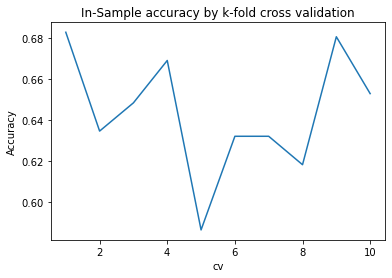

In [37]:
plt.xlabel('cv')
plt.ylabel('Accuracy')
plt.title('In-Sample accuracy by k-fold cross validation')
_=plt.plot([1,2, 3, 4, 5,6, 7, 8,9, 10], cv_score)


In [31]:
steps=[('imputer', KNNImputer(n_neighbors=2, weights='uniform')), ('scaler', StandardScaler()), 
       ('random_forest', RandomForestClassifier())]
pipeline=Pipeline(steps)
params_rf = {
    'random_forest__n_estimators': range(50,100), 
    'random_forest__max_features':('auto', 'sqrt'),
    'random_forest__max_depth':(4,10, None)
}
grid=GridSearchCV(pipeline, param_grid=params_rf)
grid.fit(X_train, np.ravel(y_grade_train))
y_pred=grid.predict(X_test)

print('Tuned Model Parameters: {}'.format(grid.best_params_))

Tuned Model Parameters: {'random_forest__max_depth': 4, 'random_forest__max_features': 'auto', 'random_forest__n_estimators': 50}


In [58]:
rf=RandomForestClassifier(n_estimators=50, random_state=42, max_depth = 4)
rf.fit(X_train, y_grade_train)
cv_score=cross_val_score(rf, X_train, y_grade_train, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score])
print('Mean 10-fold cross validation accuracy: %.4f, std: %.4f' % (np.mean(cv_score), np.std(cv_score)))
print('Out-sample accuracy: %4f' % rf.score(X_test, np.ravel(y_grade_test)))


[0.7586, 0.7586, 0.7586, 0.7586, 0.7517, 0.7569, 0.7569, 0.7569, 0.7569, 0.7431]
Mean 10-fold cross validation accuracy: 0.7557, std: 0.0046
Out-sample accuracy: 0.752941


In [57]:
from sklearn.metrics import accuracy_score
rf.fit(X_train, y_grade_train)
y_grade_pred=rf.predict(X_train)
accuracy_score(y_grade_train, y_rating_pred)
print('In-sample accuracy: %4f' % accuracy_score(y_grade_train, y_grade_pred))

In-sample accuracy: 0.757093


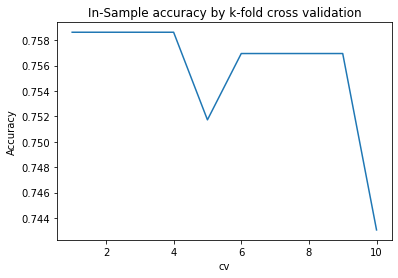

In [40]:
plt.xlabel('cv')
plt.ylabel('Accuracy')
plt.title('In-Sample accuracy by k-fold cross validation')
_=plt.plot([1,2, 3, 4, 5,6, 7, 8,9, 10], cv_score)

 1) Gross Margin               0.045259
 2) Total MV                   0.043639
 3) ST Debt                    0.043607
 4) Interest Coverage          0.043310
 5) Total Liquidity            0.042580
 6) EBITDA Margin              0.042253
 7) Sales/Revenues             0.041755
 8) Net Debt/MV                0.040104
 9) PE                         0.039944
10) Current Liquidity          0.039648
11) Total Debt/MV              0.039631
12) Free Cash Flow             0.039075
13) EBITDA                     0.038625
14) LT Debt                    0.038565
15) Cash                       0.037724
16) Current Liabilities        0.037266
17) CFO                        0.036868
18) ROE                        0.036757
19) Net Debt/EBITDA            0.035656
20) Net Debt                   0.035633
21) CFO/Debt                   0.035303
22) Total Debt                 0.035267
23) Total Debt/EBITDA          0.034930
24) Net Income Before Extras   0.032926
25) EPS Before Extras          0.031921


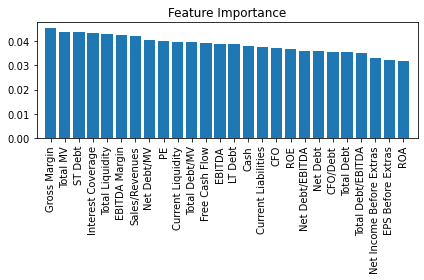

In [29]:
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 26, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()